# Data Analytics 101 (Evening Session)

### Import Packages

In [13]:
import pandas as pd 
import numpy as np

### Read dataset

In [14]:
imp = pd.read_csv('56-malaysias-import-sources.csv', encoding = 'iso-8859-1')

### Inspect dataset 
#### Dataset does not show the correct headers

In [15]:
imp.head()

,Malaysia's Import Sources,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,NaN,NaN,NaN,NaN,NaN
1,Year,Month,Country,Country Code,Total Import (USD)
2,2016,1,AFGHANISTAN,AF,"10,609"
3,2016,1,ALBANIA,AL,"7,947"
4,2016,1,ALGERIA,DZ,0


### Check the bottom rows of the dataset and it shows rows withour relevant information

In [16]:
imp.tail()

,Malaysia's Import Sources,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
2570,2016,12,WESTERN SAMOA,WS,0
2571,2016,12,ZAMBIA,ZM,"862,212"
2572,2016,12,ZIMBABWE,ZW,"143,476"
2573,NaN,NaN,NaN,NaN,NaN
2574,Note:\ni. Source : Department Of Statistics Ma...,NaN,NaN,NaN,NaN


### Place header and skipfooter argument to obtain correct header and remove last rows

##### The red is not an error it is JUST A WARNING we can ignore it 

In [17]:
imp = pd.read_csv('56-malaysias-import-sources.csv', encoding = 'iso-8859-1',header=2 , skipfooter=2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### check dataset again

In [18]:
imp.head()

,Year,Month,Country,Country Code,Total Import (USD)
0,2016,1,AFGHANISTAN,AF,"10,609"
1,2016,1,ALBANIA,AL,"7,947"
2,2016,1,ALGERIA,DZ,0
3,2016,1,AMERICAN SAMOA,AS,0
4,2016,1,ANDORRA,AD,0


In [19]:
imp.tail()

,Year,Month,Country,Country Code,Total Import (USD)
2566,2016,12,VANUATU,VU,"307,618"
2567,2016,12,VENEZUELA,VE,"22,124,814"
2568,2016,12,WESTERN SAMOA,WS,0
2569,2016,12,ZAMBIA,ZM,"862,212"
2570,2016,12,ZIMBABWE,ZW,"143,476"


### View info on dataset to check if everything is good
#### There number of non-null values do not tally. Something must be wrong

In [20]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 5 columns):
Year                  2571 non-null int64
Month                 2571 non-null int64
Country               2571 non-null object
Country Code          2559 non-null object
Total Import (USD)    2571 non-null object
dtypes: int64(2), object(3)
memory usage: 100.5+ KB


### Check if there are null values in the dataset

In [21]:
imp.isnull().values.any()

True

### view rows with null values

In [22]:
imp[imp.isnull().any(axis=1)] 

,Year,Month,Country,Country Code,Total Import (USD)
125,2016,1,NAMIBIA,NaN,"277,445"
339,2016,2,NAMIBIA,NaN,"260,329"
557,2016,3,NAMIBIA,NaN,"152,975"
772,2016,4,NAMIBIA,NaN,"337,842"
991,2016,5,NAMIBIA,NaN,0
1206,2016,6,NAMIBIA,NaN,"65,484"
1421,2016,7,NAMIBIA,NaN,"177,356"
1632,2016,8,NAMIBIA,NaN,"149,382"
1845,2016,9,NAMIBIA,NaN,"202,926"
2059,2016,10,NAMIBIA,NaN,"24,685"


### view column names

In [16]:
list(imp)

['Year', 'Month', 'Country', 'Country\xa0Code', 'Total\xa0Import (USD)']

### View values in the row, it is not an integer which is a problem 

In [18]:
imp['Total\xa0Import (USD)'][0]

'10,609'

### Double check the type of the value in the cell

In [19]:
type(imp['Total\xa0Import (USD)'][0])

str

### Steps in cleaning the dataset

#### 1. change NA into NAM 
#### 2. We have change \xa0 into " "
#### 3. we have to change values in Import into int 

In [23]:
# rename columns
imp.columns = ['Year', 'Month', 'Country', 'Country Code', 'Import']
# replace \xa0
imp = imp.replace({'\xa0':" "}, regex=True)
# palcing NAM instead of NA
imp.loc[imp['Country'] == "NAMIBIA", 'Country Code'] = "NAM"
# convert strings into number 
imp["Import"] = imp['Import'].replace({',':''}, regex=True)
imp["Import"] = imp['Import'].apply(int)


#### Check top 5 rows of dataset

In [24]:
imp.head()

,Year,Month,Country,Country Code,Import
0,2016,1,AFGHANISTAN,AF,10609
1,2016,1,ALBANIA,AL,7947
2,2016,1,ALGERIA,DZ,0
3,2016,1,AMERICAN SAMOA,AS,0
4,2016,1,ANDORRA,AD,0


#### check info again

In [25]:
imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2571 entries, 0 to 2570
Data columns (total 5 columns):
Year            2571 non-null int64
Month           2571 non-null int64
Country         2571 non-null object
Country Code    2571 non-null object
Import          2571 non-null int64
dtypes: int64(3), object(2)
memory usage: 100.5+ KB


### Import another dataset for export values

In [26]:
exp = pd.read_csv('55-malaysias-export-destination.csv', encoding = 'iso-8859-1',header=2 , skipfooter=2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


### Check and clean dataset as we did in the previous one. 

In [28]:
exp.head()

,Year,Month,Country,Country Code,Total Export (USD)
0,2016,1,AFGHANISTAN,AF,"6,533,359"
1,2016,1,ALBANIA,AL,"95,077"
2,2016,1,ALGERIA,DZ,"11,758,400"
3,2016,1,AMERICAN SAMOA,AS,"39,681"
4,2016,1,ANDORRA,AD,"72,293"


In [29]:
# rename columns
exp.columns = ['Year', 'Month', 'Country', 'Country Code', 'Export']
# replace \xa0
exp = exp.replace({'\xa0':" "}, regex=True)
# palcing NAM instead of NA
exp.loc[exp['Country'] == "NAMIBIA", 'Country Code'] = "NAM"
# convert strings into number 
exp["Export"] = exp['Export'].replace({',':''}, regex=True)
exp["Export"] = exp['Export'].apply(int)

### Check length of datasets

In [30]:
len(exp)

2571

In [31]:
len(imp)

2571

### Making a new dataset from the previos 2

### Choosing the relevant columns for making a new dataset

In [32]:
col_exp = ['Month', 'Country', 'Export']


In [33]:
col_exp

['Month', 'Country', 'Export']

### Making a new dataset with the colums specified

In [34]:
slim_exp = exp[col_exp]

In [35]:
slim_exp

,Month,Country,Export
0,1,AFGHANISTAN,6533359
1,1,ALBANIA,95077
2,1,ALGERIA,11758400
3,1,AMERICAN SAMOA,39681
4,1,ANDORRA,72293
5,1,ANGOLA,8731875
6,1,ANGUILLA,4578
7,1,ANTIGUA & BARBUDA,399412
8,1,ARGENTINA,12524335
9,1,ARMENIA,195464


### slim_imp dataset with only index and Import column

In [36]:
col_imp = ['Import']

In [37]:
slim_imp = imp[col_imp]

In [38]:
slim_imp

,Import
0,10609
1,7947
2,0
3,0
4,0
5,290967
6,0
7,0
8,43458878
9,0


### View what does pd.merge does by adding a ? after it 

In [39]:
pd.merge?

### Combining the 2 datasets slim_exp & slim_imp

In [40]:
pd.merge(slim_exp, slim_imp, how = "inner", left_index= True, right_index=True)

,Month,Country,Export,Import
0,1,AFGHANISTAN,6533359,10609
1,1,ALBANIA,95077,7947
2,1,ALGERIA,11758400,0
3,1,AMERICAN SAMOA,39681,0
4,1,ANDORRA,72293,0
5,1,ANGOLA,8731875,290967
6,1,ANGUILLA,4578,0
7,1,ANTIGUA & BARBUDA,399412,0
8,1,ARGENTINA,12524335,43458878
9,1,ARMENIA,195464,0


### Assigning a variable to the merged dataset

In [41]:
exp_imp = pd.merge(slim_exp, slim_imp, how = "inner", left_index= True, right_index=True)

### Viewing the dataset

In [42]:
exp_imp.tail()

,Month,Country,Export,Import
2566,12,VANUATU,324606,307618
2567,12,VENEZUELA,470352,22124814
2568,12,WESTERN SAMOA,319444,0
2569,12,ZAMBIA,271947,862212
2570,12,ZIMBABWE,619407,143476


### calculationg export - import 

### export - import  = BOT

In [43]:
619407 - 143476

475931

### Making a new column 

In [44]:
exp_imp['BOT'] = exp_imp['Export'] - exp_imp["Import"]

In [45]:
exp_imp.tail()


,Month,Country,Export,Import,BOT
2566,12,VANUATU,324606,307618,16988
2567,12,VENEZUELA,470352,22124814,-21654462
2568,12,WESTERN SAMOA,319444,0,319444
2569,12,ZAMBIA,271947,862212,-590265
2570,12,ZIMBABWE,619407,143476,475931


### Viewing the maximum values of BOT

In [46]:
exp_imp.loc[exp_imp['BOT'].idxmax()]

Month                         12
Country    REPUBLIC OF SINGAPORE
Export                2452499982
Import                1376037879
BOT                   1076462103
Name: 2518, dtype: object

### viewing the minimum value of BOT

In [59]:
exp_imp.loc[exp_imp['BOT'].idxmin()]

Month                               6
Country    PEOPLE'S REPUBLIC OF CHINA
Export                     1881793225
Import                     3236289669
BOT                       -1354496444
Name: 1227, dtype: object

# Plot graph

## import matplotlib.pyplot which is used to plot graphs

In [47]:
import matplotlib.pyplot as plt 

#### filter data to only obtain singapore

In [48]:
singapore = exp_imp[exp_imp['Country'] == "REPUBLIC OF SINGAPORE"]

### view data

In [49]:
singapore

,Month,Country,Export,Import,BOT
156,1,REPUBLIC OF SINGAPORE,2070221203,1507449808,562771395
371,2,REPUBLIC OF SINGAPORE,1897714235,1273649128,624065107
588,3,REPUBLIC OF SINGAPORE,2287069501,1376944507,910124994
804,4,REPUBLIC OF SINGAPORE,2343151544,1388198618,954952926
1022,5,REPUBLIC OF SINGAPORE,2098509151,1372566851,725942300
1237,6,REPUBLIC OF SINGAPORE,2408595392,1665229749,743365643
1451,7,REPUBLIC OF SINGAPORE,2277493759,1456698375,820795384
1663,8,REPUBLIC OF SINGAPORE,2486442274,1466175375,1020266899
1875,9,REPUBLIC OF SINGAPORE,2533374249,1529666433,1003707816
2090,10,REPUBLIC OF SINGAPORE,2323560095,1596099550,727460545


### Obtain values in Months column

In [50]:
Months = singapore["Month"].values

In [67]:
Months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

### Assigning variables to values from certain columns

In [51]:
sing_exp = singapore['Export']
sing_imp = singapore['Import']
sing_bot = singapore["BOT"]

In [52]:
sing_exp

156     2070221203
371     1897714235
588     2287069501
804     2343151544
1022    2098509151
1237    2408595392
1451    2277493759
1663    2486442274
1875    2533374249
2090    2323560095
2304    2413097382
2518    2452499982
Name: Export, dtype: int64

### Plot graphs

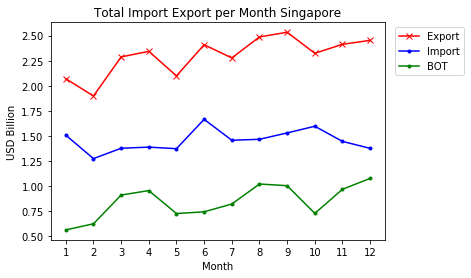

In [53]:

# Plot a line Months on the X-Axis and sing_exp values devided by 1e9 on the y-axis
# colour of line is red with x marking the points
plt.plot(Months, sing_exp/1e9, 'rx-') 

# Plot a line Months on the X-Axis and sing_imp values devided by 1e9 on the y-axis
# colour of line is blue with . marking the points
plt.plot(Months, sing_imp/1e9, 'b.-')

# Plot a line Months on the X-Axis and sing_bot values devided by 1e9 on the y-axis
# colour of line is gree with . marking the points
plt.plot(Months, sing_bot/1e9, 'g.-')

xticks =[Months]

#
plt.xticks(Months)

plt.legend(loc=1 , bbox_to_anchor=(1.25, 1))
plt.xlabel('Month')
plt.ylabel("USD Billion")
plt.title('Total Import Export per Month Singapore')
plt.show()

In [ ]:
# Exercise given at end of Class
# 1. Plot BOT in the graph above - colour green 
# 2. Move legend so that it does not block graphs 
# 3. change y-axis label to USD (Billion)